<a href="https://colab.research.google.com/github/vinayykkumar/Forecasting-Trends-with-Powerful-LSTM_Models_Infosys_Internship_Oct2024/blob/main/stacked_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Load data from the Excel file
data_path = '/content/yahoo_data.xlsx'
data = pd.read_excel(data_path)

In [ ]:
# Load and preprocess the data
data['Date'] = pd.to_datetime(data['Date']) # Use 'data' instead of 'sheet_data'
data.sort_values('Date', inplace=True)  # Sort by date

In [ ]:
# Focus on the 'Close*' column for prediction
closing_prices = data['Close*'].values.reshape(-1, 1)
# Replace 'sheet_data' with 'data' to use the loaded DataFrame

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices)

In [ ]:
# Create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 60  # Use the last 60 days to predict the next day
X, y = create_sequences(closing_prices_scaled, sequence_length)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
# Build the stacked LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)  # Output layer
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train the model
epochs = 50
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.1155 - mae: 0.2570 - val_loss: 0.0116 - val_mae: 0.0947
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 0.0100 - mae: 0.0762 - val_loss: 0.0063 - val_mae: 0.0662
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0086 - mae: 0.0698 - val_loss: 0.0040 - val_mae: 0.0529
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0068 - mae: 0.0619 - val_loss: 0.0035 - val_mae: 0.0481
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0057 - mae: 0.0561 - val_loss: 0.0034 - val_mae: 0.0476
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0059 - mae: 0.0575 - val_loss: 0.0042 - val_mae: 0.0545
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0055 - mae: 0.0538 - val_loss: 0.0031 - val_mae: 0.0455
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 0.0047 - mae: 0.0513 - val_loss: 0.0030 - val_mae: 0.0445
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}, Test MAE: {mae}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020 - mae: 0.0377
Test Loss: 0.001655328320339322, Test MAE: 0.03407364711165428


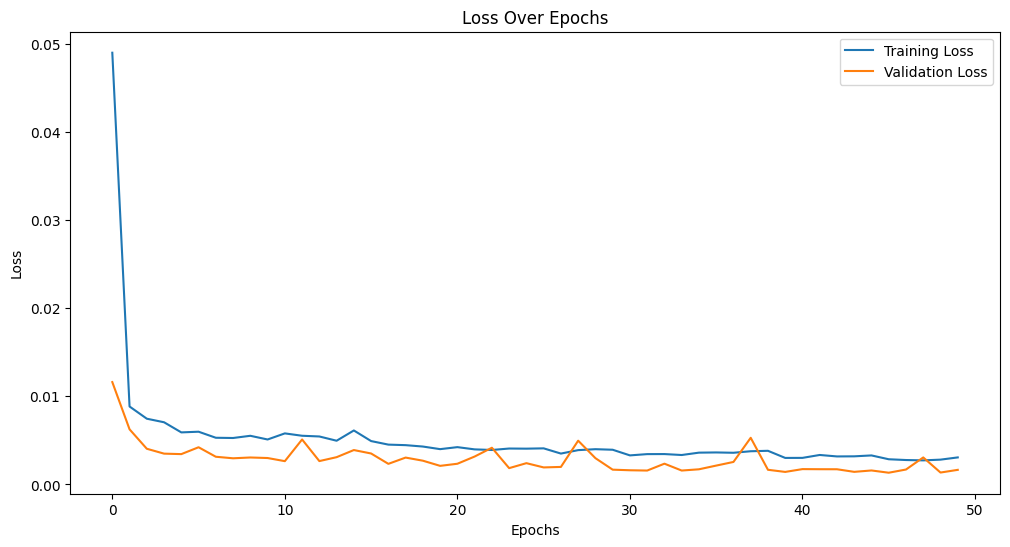

In [ ]:
# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # De-normalize the predictions
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


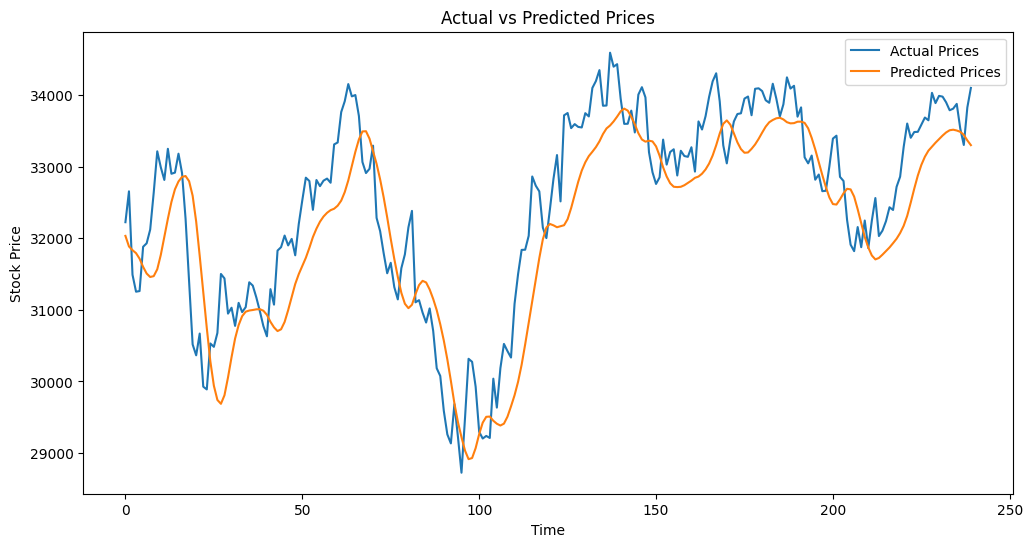

In [ ]:
# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()